In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'Age': np.float64})

In [3]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df = df.rename(columns=cols)

In [4]:
df['embarked'] = df.Embarked.fillna('S')
df['Age'] = df.Age.fillna(df.Age.median())

In [5]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]

Text(0, 0.5, '')

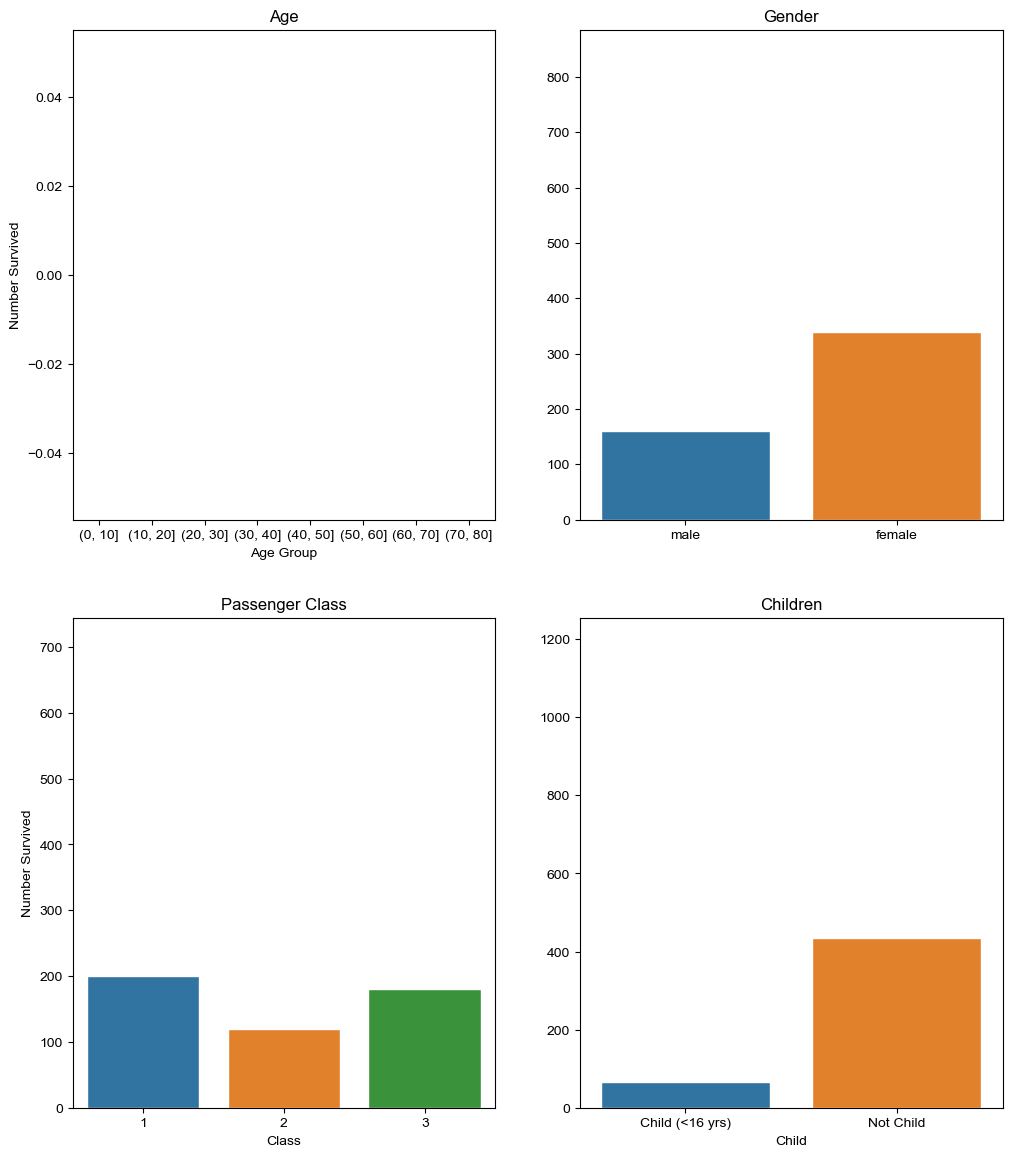

In [6]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('dark')
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('dark')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=['male','female'])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')

sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      1309 non-null   float64 
 1   Survived    1309 non-null   float64 
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1310 non-null   float64 
 5   Sibsp       1309 non-null   float64 
 6   Parch       1309 non-null   float64 
 7   Ticket      1309 non-null   object  
 8   Fare        1308 non-null   float64 
 9   Cabin       295 non-null    object  
 10  Embarked    1307 non-null   object  
 11  Boat        486 non-null    object  
 12  Body        121 non-null    float64 
 13  Home.Dest   745 non-null    object  
 14  embarked    1310 non-null   object  
 15  age_binned  1310 non-null   category
 16  Child       1310 non-null   int32   
dtypes: category(1), float64(7), int32(1), object(8)
memory usage: 160.5+ KB


C:\Users\Prani\AppData\Local\Temp\ipykernel_2112\611127090.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, ci=None)


Text(0.5, 0, '')

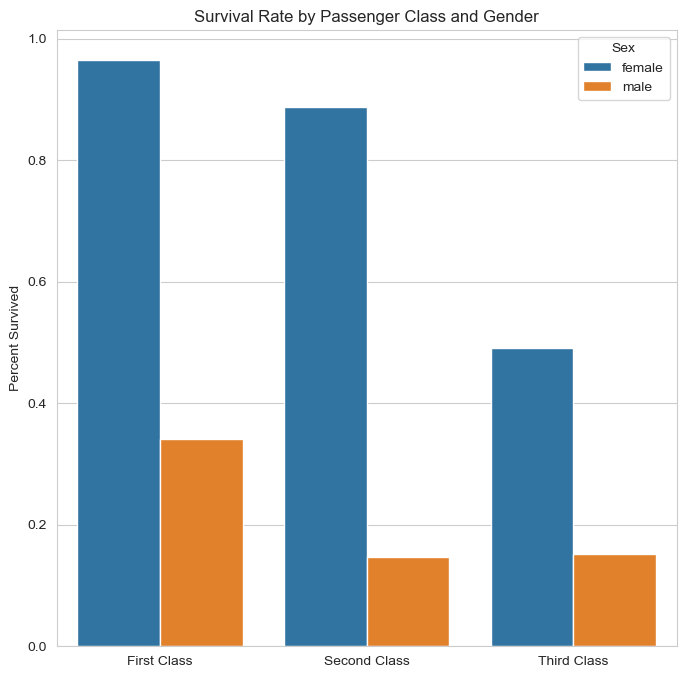

In [8]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')

In [9]:
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [10]:
titanic_df=pd.read_csv("titanic.csv")

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [12]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [13]:
titanic_df.head(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"


In [14]:
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1189,90.8
cabin,1015,77.5
boat,824,62.9
home.dest,565,43.1
age,264,20.2


In [15]:
titanic_df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

C:\Users\Prani\AppData\Local\Temp\ipykernel_2112\1622606162.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(
C:\Users\Prani\AppData\Local\Temp\ipykernel_2112\1622606162.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(
C:\Users\Prani\AppData\Local\Temp\ipykernel_2112\162260616

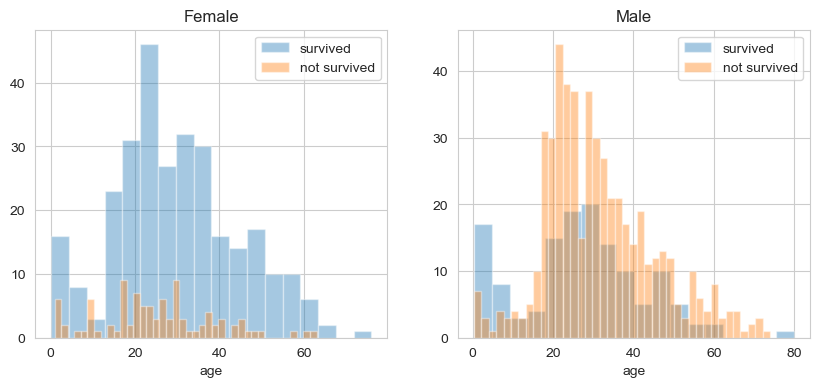

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = titanic_df[titanic_df['sex'] == 'female']
men = titanic_df[titanic_df['sex'] == 'male']

# Female plots
ax = sns.distplot(
    women[women['survived'] == 1].age.dropna(),
    bins=18,
    label=survived,
    ax=axes[0],
    kde=False
)
ax = sns.distplot(
    women[women['survived'] == 0].age.dropna(),
    bins=40,
    label=not_survived,
    ax=axes[0],
    kde=False
)
ax.legend()
ax.set_title('Female')

# Male plots
ax = sns.distplot(
    men[men['survived'] == 1].age.dropna(),
    bins=18,
    label=survived,
    ax=axes[1],
    kde=False
)
ax = sns.distplot(
    men[men['survived'] == 0].age.dropna(),
    bins=40,
    label=not_survived,
    ax=axes[1],
    kde=False
)
ax.legend()
_ = ax.set_title('Male')

plt.show()


C:\Users\Prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


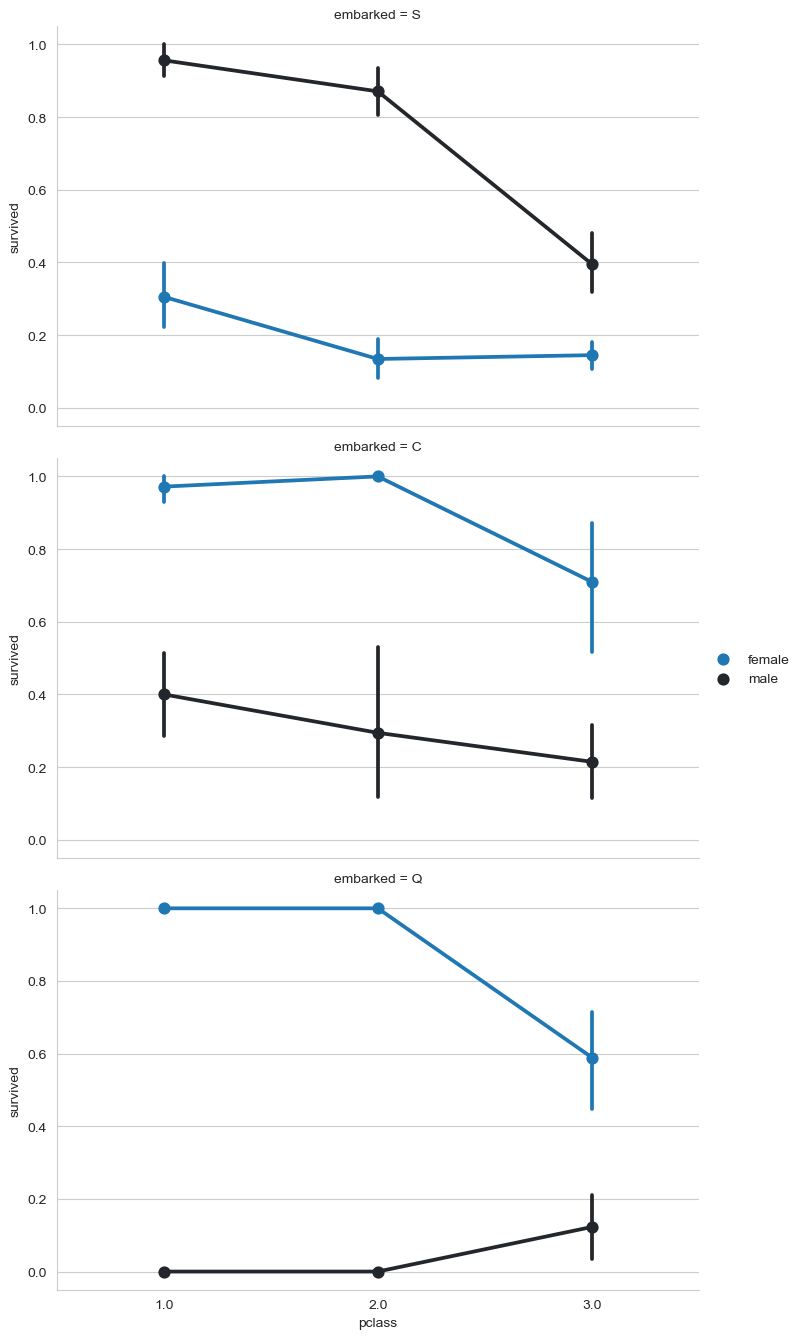

In [17]:
FacetGrid = sns.FacetGrid(titanic_df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<Axes: xlabel='pclass', ylabel='survived'>

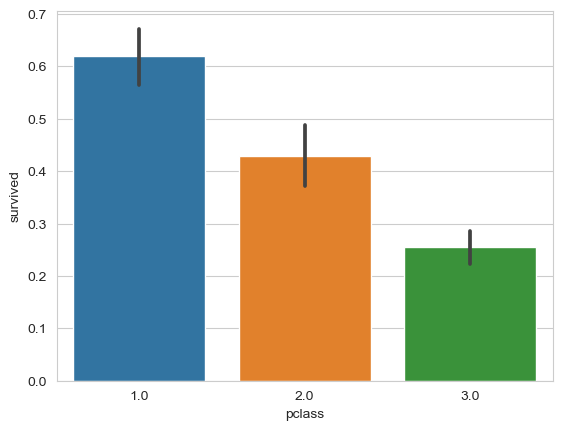

In [18]:
sns.barplot(x='pclass', y='survived', data=titanic_df)

In [19]:
data = [titanic_df]

for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    # Start with all as 1 (alone)
    dataset['not_alone'] = 1
    # If relatives > 0, then not alone = 0
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)

print(titanic_df['not_alone'].value_counts())

not_alone
1    791
0    519
Name: count, dtype: int64


C:\Users\Prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


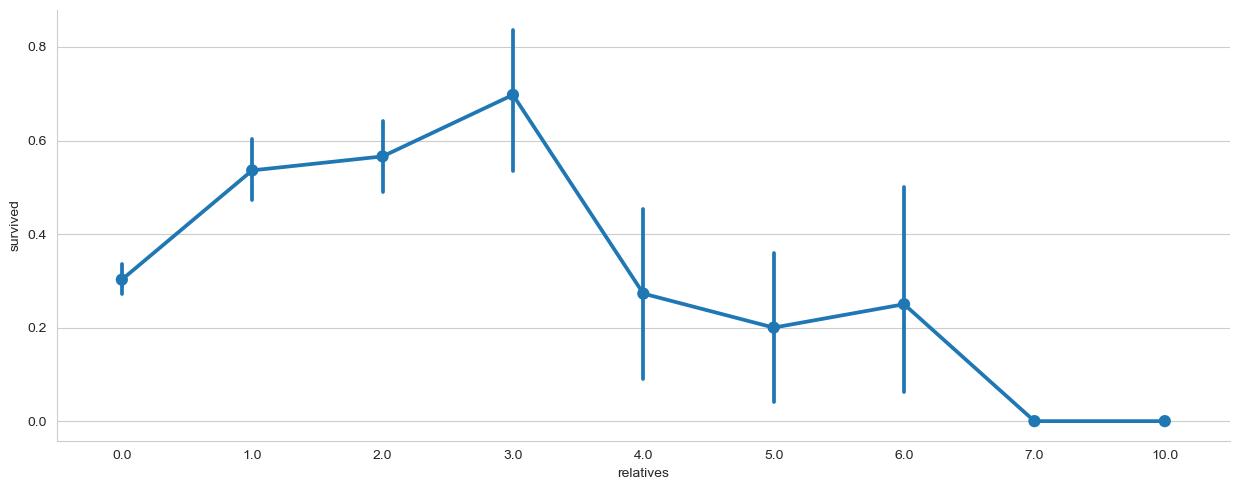

In [20]:
axes = sns.catplot(x='relatives', y='survived', data=titanic_df, aspect=2.5, kind="point")

In [21]:
titanic_df = titanic_df.drop(['cabin'], axis=1)

In [22]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",0.0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",3.0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3.0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0


In [23]:
data = [titanic_df]

for dataset in data:
    mean = dataset['age'].mean()
    std = dataset['age'].std()
    is_null = dataset['age'].isnull().sum()

    rand_age = np.random.randint(mean - std, mean + std, size=is_null)

    age_slice = dataset['age'].copy()

    age_slice[np.isnan(age_slice)] = rand_age

    dataset['age'] = age_slice.astype(int)

print(titanic_df['age'].isnull().sum())

0


In [24]:
print(titanic_df['embarked'].describe())

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object


In [25]:
common_value = 'S'
titanic_df['embarked'] = titanic_df['embarked'].fillna(common_value)

In [26]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   int32  
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1310 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
 13  relatives  1309 non-null   float64
 14  not_alone  1310 non-null   int32  
dtypes: float64(7), int32(2), object(6)
memory usage: 143.4+ KB


In [27]:
titanic_df['fare'] = titanic_df['fare'].fillna(0)
titanic_df['fare'] = titanic_df['fare'].astype(int)

In [28]:
titanic_df['Title'] = titanic_df['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_df['Title'] = titanic_df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev',
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'] = titanic_df['Title'].fillna(0)
titanic_df = titanic_df.drop("name", axis=1)

In [29]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Title
0,1.0,1.0,female,29,0.0,0.0,24160,211,S,2,NaN,"St Louis, MO",0.0,1,2.0
1,1.0,1.0,male,0,1.0,2.0,113781,151,S,11,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,4.0
2,1.0,0.0,female,2,1.0,2.0,113781,151,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,2.0
3,1.0,0.0,male,30,1.0,2.0,113781,151,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3.0,0,1.0
4,1.0,0.0,female,25,1.0,2.0,113781,151,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,3.0


In [30]:
genders = {"male": 0, "female": 1}
titanic_df['sex'] = titanic_df['sex'].map(genders)

In [31]:
titanic_df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [32]:
ports = {"S": 0, "C": 1, "Q": 2}
titanic_df['embarked'] = titanic_df['embarked'].map(ports)

In [33]:
titanic_df['age'] = titanic_df['age'].fillna(-0.5).astype(int)  # fill missing with -0.5 so they fall in a new bin

titanic_df.loc[titanic_df['age'] <= 11, 'age'] = 0
titanic_df.loc[(titanic_df['age'] > 11) & (titanic_df['age'] <= 18), 'age'] = 1
titanic_df.loc[(titanic_df['age'] > 18) & (titanic_df['age'] <= 22), 'age'] = 2
titanic_df.loc[(titanic_df['age'] > 22) & (titanic_df['age'] <= 27), 'age'] = 3
titanic_df.loc[(titanic_df['age'] > 27) & (titanic_df['age'] <= 33), 'age'] = 4
titanic_df.loc[(titanic_df['age'] > 33) & (titanic_df['age'] <= 40), 'age'] = 5
titanic_df.loc[(titanic_df['age'] > 40) & (titanic_df['age'] <= 66), 'age'] = 6
titanic_df.loc[titanic_df['age'] > 66, 'age'] = 6

print(titanic_df['age'].value_counts())

age
6    251
4    237
3    214
5    199
2    178
1    140
0     91
Name: count, dtype: int64


In [34]:
titanic_df.head(10)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Title
0,1.0,1.0,1.0,4,0.0,0.0,24160,211,0,2,NaN,"St Louis, MO",0.0,1,2.0
1,1.0,1.0,0.0,0,1.0,2.0,113781,151,0,11,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,4.0
2,1.0,0.0,1.0,0,1.0,2.0,113781,151,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,2.0
3,1.0,0.0,0.0,4,1.0,2.0,113781,151,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",3.0,0,1.0
4,1.0,0.0,1.0,3,1.0,2.0,113781,151,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,3.0
5,1.0,1.0,0.0,6,0.0,0.0,19952,26,0,3,NaN,"New York, NY",0.0,1,1.0
6,1.0,1.0,1.0,6,1.0,0.0,13502,77,0,10,NaN,"Hudson, NY",1.0,0,2.0
7,1.0,0.0,0.0,5,0.0,0.0,112050,0,0,NaN,NaN,"Belfast, NI",0.0,1,1.0
8,1.0,1.0,1.0,6,2.0,0.0,11769,51,0,D,NaN,"Bayside, Queens, NY",2.0,0,3.0
9,1.0,0.0,0.0,6,0.0,0.0,PC 17609,49,1,NaN,22.0,"Montevideo, Uruguay",0.0,1,1.0


In [35]:
titanic_df.loc[titanic_df['fare'] <= 7.91, 'fare'] = 0
titanic_df.loc[(titanic_df['fare'] > 7.91) & (titanic_df['fare'] <= 14.454), 'fare'] = 1
titanic_df.loc[(titanic_df['fare'] > 14.454) & (titanic_df['fare'] <= 31), 'fare'] = 2
titanic_df.loc[(titanic_df['fare'] > 31) & (titanic_df['fare'] <= 99), 'fare'] = 3
titanic_df.loc[(titanic_df['fare'] > 99) & (titanic_df['fare'] <= 250), 'fare'] = 4
titanic_df.loc[titanic_df['fare'] > 250, 'fare'] = 5

titanic_df['fare'] = titanic_df['fare'].astype(int)

In [36]:
titanic_df['Age_Class'] = titanic_df['age'] * titanic_df['pclass']

In [37]:
titanic_df['relatives'] = titanic_df['sibsp'] + titanic_df['parch']
titanic_df['Fare_Per_Person'] = titanic_df['fare'] / (titanic_df['relatives'] + 1)
titanic_df['Fare_Per_Person'] = titanic_df['Fare_Per_Person'].fillna(0)
titanic_df['Fare_Per_Person'] = titanic_df['Fare_Per_Person'].astype(int)
titanic_df.head(10)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,1.0,1.0,1.0,4,0.0,0.0,24160,4,0,2,NaN,"St Louis, MO",0.0,1,2.0,4.0,4
1,1.0,1.0,0.0,0,1.0,2.0,113781,4,0,11,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,4.0,0.0,1
2,1.0,0.0,1.0,0,1.0,2.0,113781,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,2.0,0.0,1
3,1.0,0.0,0.0,4,1.0,2.0,113781,4,0,NaN,135.0,"Montreal, PQ / Chesterville, ON",3.0,0,1.0,4.0,1
4,1.0,0.0,1.0,3,1.0,2.0,113781,4,0,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0,0,3.0,3.0,1
5,1.0,1.0,0.0,6,0.0,0.0,19952,2,0,3,NaN,"New York, NY",0.0,1,1.0,6.0,2
6,1.0,1.0,1.0,6,1.0,0.0,13502,3,0,10,NaN,"Hudson, NY",1.0,0,2.0,6.0,1
7,1.0,0.0,0.0,5,0.0,0.0,112050,0,0,NaN,NaN,"Belfast, NI",0.0,1,1.0,5.0,0
8,1.0,1.0,1.0,6,2.0,0.0,11769,3,0,D,NaN,"Bayside, Queens, NY",2.0,0,3.0,6.0,1
9,1.0,0.0,0.0,6,0.0,0.0,PC 17609,3,1,NaN,22.0,"Montevideo, Uruguay",0.0,1,1.0,6.0,3
